In [68]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import math
from tagger import Tagger
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap


In [79]:
# pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

valids = pd.read_csv('../data/train_valid_all.csv')
# valids = valids[:10]


responses = valids['Response'].tolist()
embeddings = model.encode(responses)
embeddings_df = pd.DataFrame(embeddings)
valids = pd.concat([valids, embeddings_df], axis=1)


In [88]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_model = PCA(n_components=50)
reduced_data = pca_model.fit_transform(embeddings_df)

tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embeddings = tsne_model.fit_transform(reduced_data, y=valids["Label"])


/var/folders/wb/67n5x4vj6qq_n5t85f5bvtww0000gn/T/ipykernel_17448/2320866012.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], cmap='Spectral', s=5)


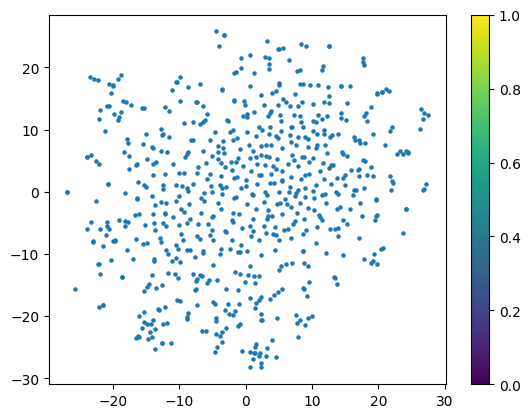

In [89]:
# Plot the result
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], cmap='Spectral', s=5)
plt.colorbar()
plt.show()

In [ ]:
# initialize
# umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, target_metric='categorical')
train_umap_embeddings = umap_model.fit_transform(embeddings_df, y=valids["Label"])

# fit n transform to 2 dimensions
# umap_embeddings = umap_model.fit_transform(embeddings_df)
umap_embeddings_df = pd.DataFrame(train_umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
valids = pd.concat([valids, umap_embeddings_df], axis=1)

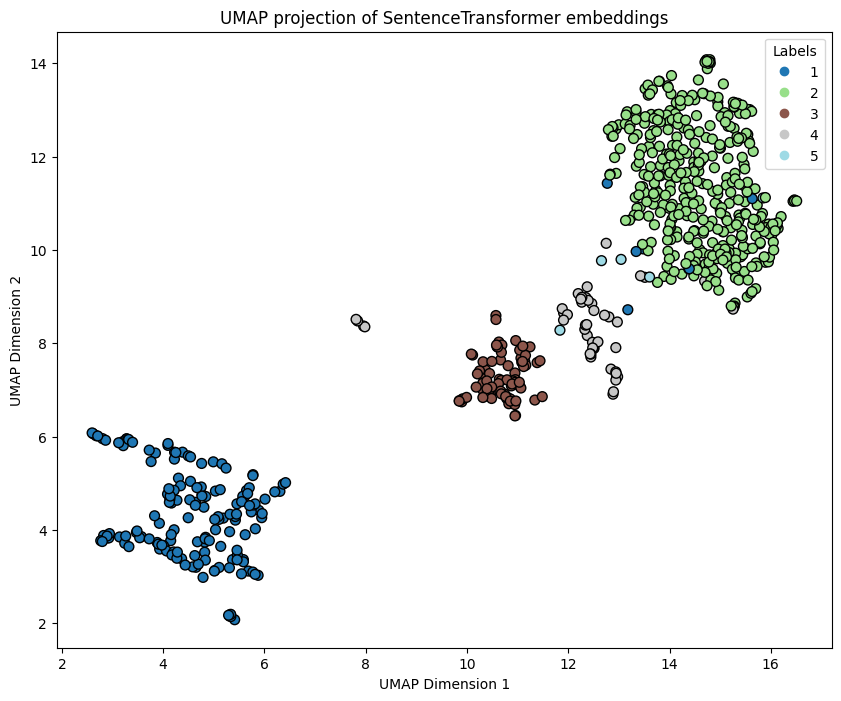

In [80]:
# plot umap embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_embeddings_df['UMAP_1'], umap_embeddings_df['UMAP_2'], c=valids['Label'], cmap='tab20', edgecolor='k', s=50)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP projection of SentenceTransformer embeddings')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()


# here below is validation

In [72]:
# pre-trained Sentence-BERT model
all_valid = pd.read_csv('../data/validation_valid_all.csv')

validation_responses = all_valid['Response'].tolist()
validation_embeddings = model.encode(validation_responses)
validation_embeddings_df = pd.DataFrame(validation_embeddings)
all_valid = pd.concat([all_valid, validation_embeddings_df], axis=1)

/var/folders/wb/67n5x4vj6qq_n5t85f5bvtww0000gn/T/ipykernel_17448/2866497576.py:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter2 = plt.scatter(umap_embeddings_df['UMAP_1'], umap_embeddings_df['UMAP_2'], c=valids['Label'], cmap='tab20', edgecolor='k', s=50, marker='x', label='Train')


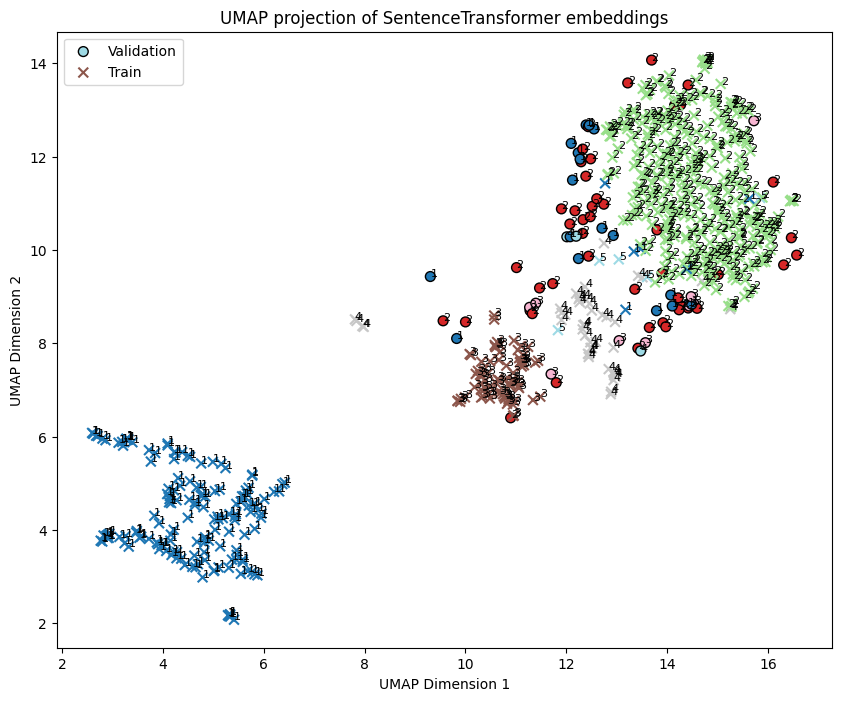

In [81]:
# fit n transform to 2 dimensions
validation_umap_embeddings = umap_model.transform(validation_embeddings_df)
validation_umap_embeddings_df = pd.DataFrame(validation_umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
all_valid = pd.concat([all_valid, validation_umap_embeddings_df], axis=1)

umap_embeddings_df = pd.DataFrame(train_umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
valids = pd.concat([valids, umap_embeddings_df], axis=1)

# plot combined umap embeddings
plt.figure(figsize=(10, 8))
scatter1 = plt.scatter(validation_umap_embeddings_df['UMAP_1'], validation_umap_embeddings_df['UMAP_2'], c=all_valid['Label'], cmap='tab20', edgecolor='k', s=50, label='Validation')
scatter2 = plt.scatter(umap_embeddings_df['UMAP_1'], umap_embeddings_df['UMAP_2'], c=valids['Label'], cmap='tab20', edgecolor='k', s=50, marker='x', label='Train')

# add labels for classes in validation and train
for i, txt in enumerate(all_valid['Label']):
    plt.annotate(txt, (validation_umap_embeddings_df['UMAP_1'][i], validation_umap_embeddings_df['UMAP_2'][i]), fontsize=8)
for i, txt in enumerate(valids['Label']):
    plt.annotate(txt, (umap_embeddings_df['UMAP_1'][i], umap_embeddings_df['UMAP_2'][i]), fontsize=8)

plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP projection of SentenceTransformer embeddings')
plt.legend(['Validation', 'Train'])
plt.show()